In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pwd

'c:\\Users\\Yashar\\Slope-Stability-Prediction\\research'

In [6]:
os.chdir('..')

In [7]:
%pwd

'c:\\Users\\Yashar\\Slope-Stability-Prediction'

In [8]:
data = pd.read_csv('artifacts/data_ingestion/slope.csv',sep=',')
data.head()

,Unit Weight (kN/m³),Cohesion (kPa),Internal Friction Angle (°),Slope Angle (°),Slope Height (m),Pore Water Pressure Ratio,Reinforcement Type,Reinforcement Numeric,Factor of Safety (FS)
0,18.745401,21.813837,38.249958,41.907228,18.451042,0.847237,Drainage,3,2.613692
1,24.507143,19.981044,24.612800,32.964623,9.266800,0.494517,Geosynthetics,2,2.241626
2,22.319939,12.926926,28.665992,58.224926,10.686165,0.195466,Retaining Wall,0,1.568244
3,20.986585,32.327000,36.582016,20.948923,13.130201,0.736642,Drainage,3,3.000000
4,16.560186,26.448087,32.052234,39.392821,14.164400,0.418678,Soil Nailing,1,3.000000


In [21]:
data.shape

(10000, 9)

In [9]:
data.describe()

,Unit Weight (kN/m³),Cohesion (kPa),Internal Friction Angle (°),Slope Angle (°),Slope Height (m),Pore Water Pressure Ratio,Reinforcement Numeric,Factor of Safety (FS)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.941596,27.703844,32.501260,34.935669,27.358871,0.503145,1.494300,2.545083
std,2.876301,13.018255,7.169344,14.449730,13.017788,0.288341,1.120399,0.659996
min,15.000116,5.007099,20.001203,10.000277,5.000753,0.000008,0.000000,0.500000
25%,17.463289,16.427561,26.343698,22.342862,15.992250,0.256956,0.000000,2.125824
50%,19.925286,27.765355,32.551702,35.001512,27.217274,0.506090,1.000000,3.000000
75%,22.400063,39.041565,38.616846,47.355813,38.771467,0.753446,3.000000,3.000000
max,24.997177,49.996617,44.997524,59.989469,49.998747,0.999940,3.000000,3.000000


In [10]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unit Weight (kN/m³)          10000 non-null  float64
 1   Cohesion (kPa)               10000 non-null  float64
 2   Internal Friction Angle (°)  10000 non-null  float64
 3   Slope Angle (°)              10000 non-null  float64
 4   Slope Height (m)             10000 non-null  float64
 5   Pore Water Pressure Ratio    10000 non-null  float64
 6   Reinforcement Type           10000 non-null  str    
 7   Reinforcement Numeric        10000 non-null  int64  
 8   Factor of Safety (FS)        10000 non-null  float64
dtypes: float64(7), int64(1), str(1)
memory usage: 703.3 KB


In [11]:
data.isnull().sum()

Unit Weight (kN/m³)            0
Cohesion (kPa)                 0
Internal Friction Angle (°)    0
Slope Angle (°)                0
Slope Height (m)               0
Pore Water Pressure Ratio      0
Reinforcement Type             0
Reinforcement Numeric          0
Factor of Safety (FS)          0
dtype: int64

In [15]:
data.dtypes

Unit Weight (kN/m³)            float64
Cohesion (kPa)                 float64
Internal Friction Angle (°)    float64
Slope Angle (°)                float64
Slope Height (m)               float64
Pore Water Pressure Ratio      float64
Reinforcement Type                 str
Reinforcement Numeric            int64
Factor of Safety (FS)          float64
dtype: object

In [30]:
data['Factor of Safety (FS)'].describe()

count    10000.000000
mean         2.545083
std          0.659996
min          0.500000
25%          2.125824
50%          3.000000
75%          3.000000
max          3.000000
Name: Factor of Safety (FS), dtype: float64

In [31]:
data['Factor of Safety (FS)'].value_counts()

Factor of Safety (FS)
3.000000    5635
0.500000      13
2.613692       1
2.241626       1
1.568244       1
            ... 
2.674985       1
1.331633       1
2.162401       1
2.974936       1
1.551228       1
Name: count, Length: 4354, dtype: int64

In [32]:
data['Safety_Status'] = (data['Factor of Safety (FS)'] >= 1.5).astype(int)
data['Safety_Status'].value_counts()


Safety_Status
1    8841
0    1159
Name: count, dtype: int64

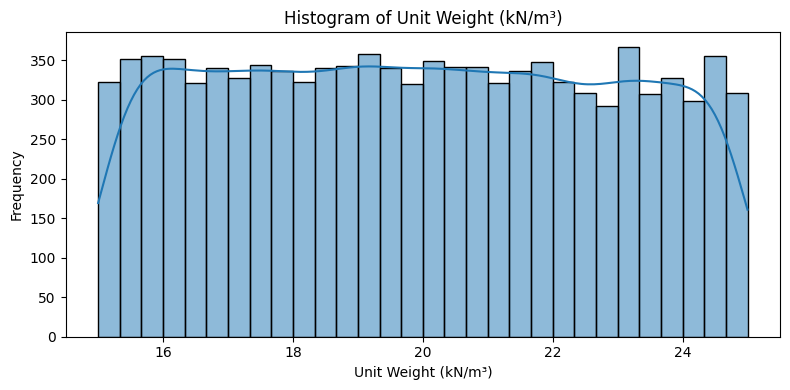

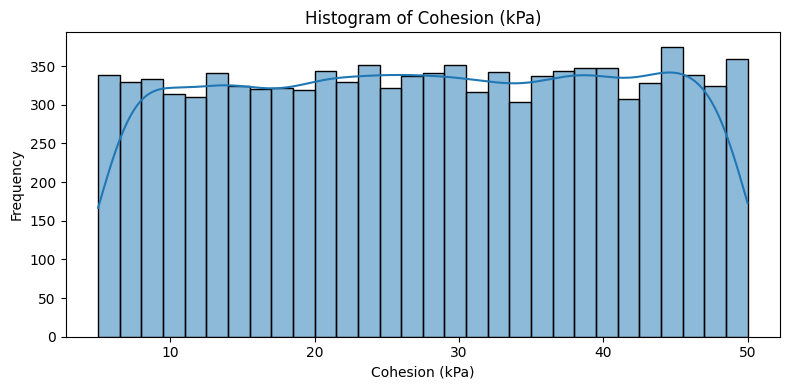

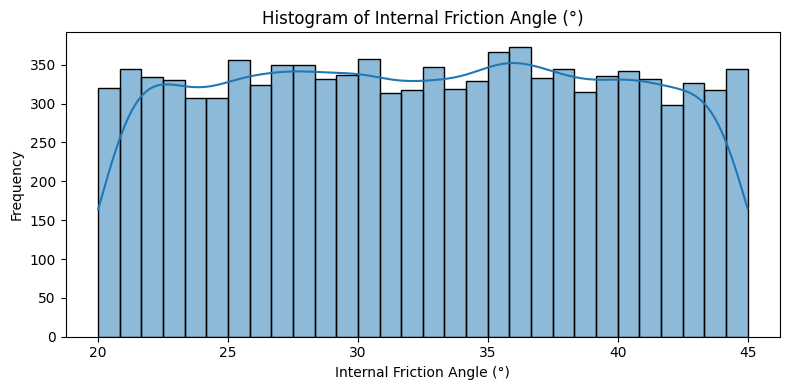

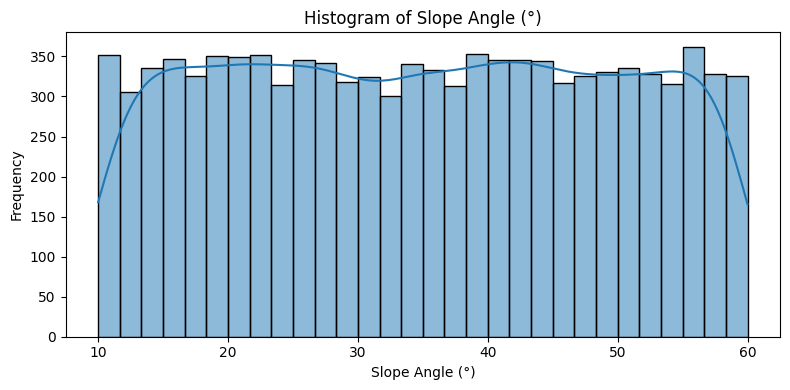

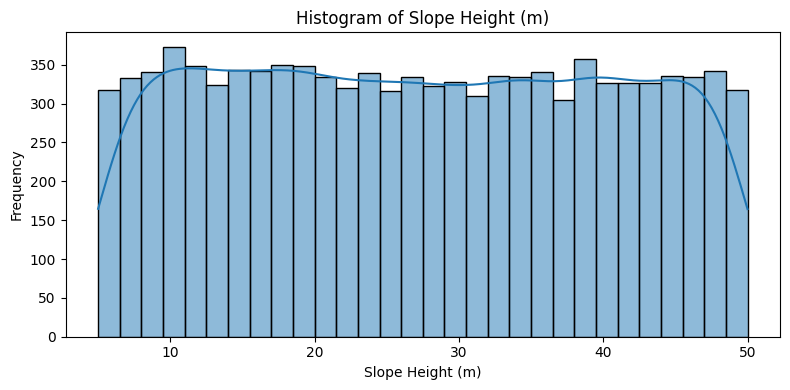

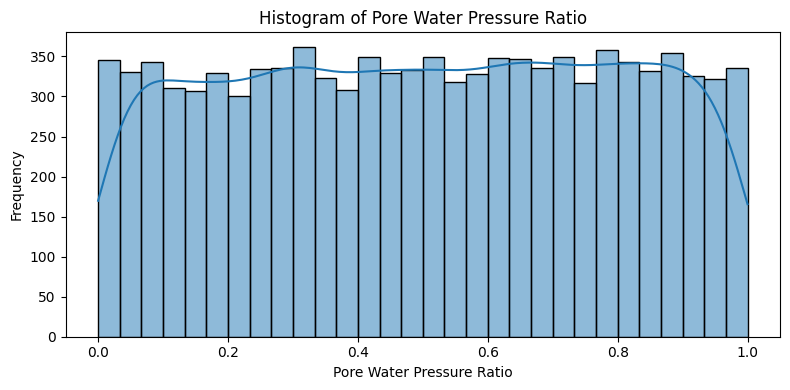

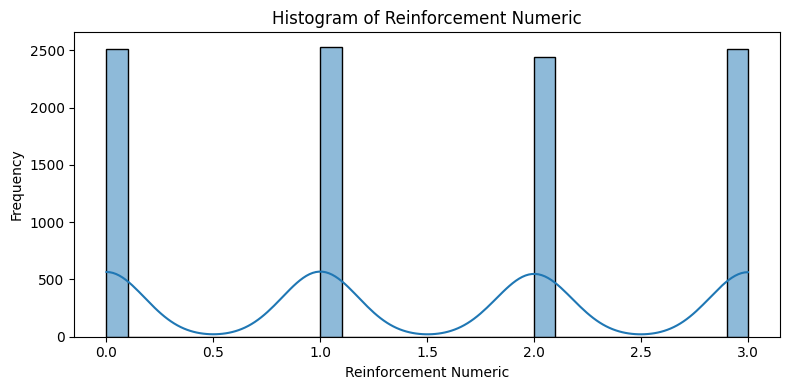

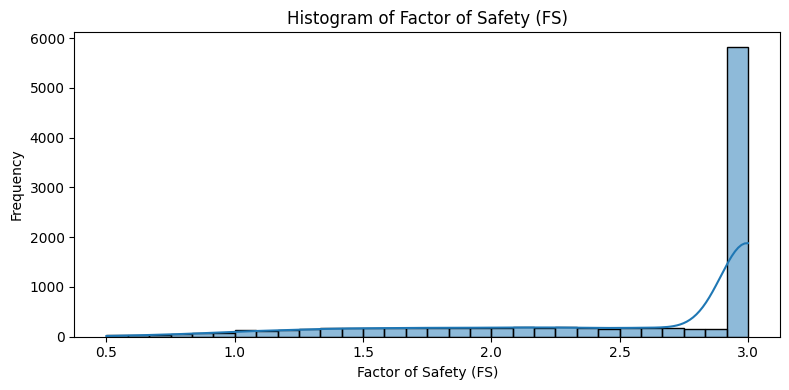

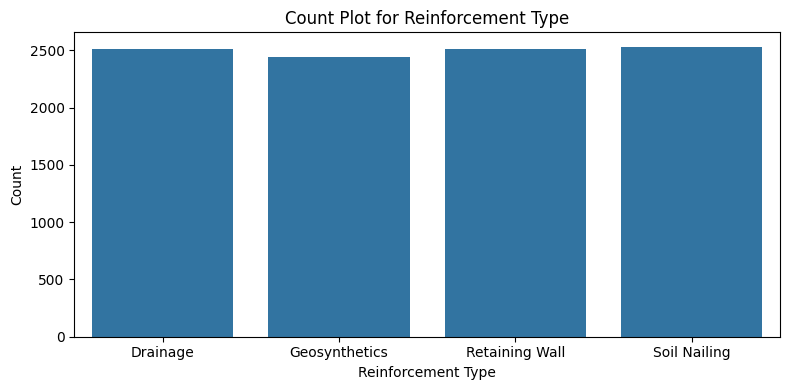

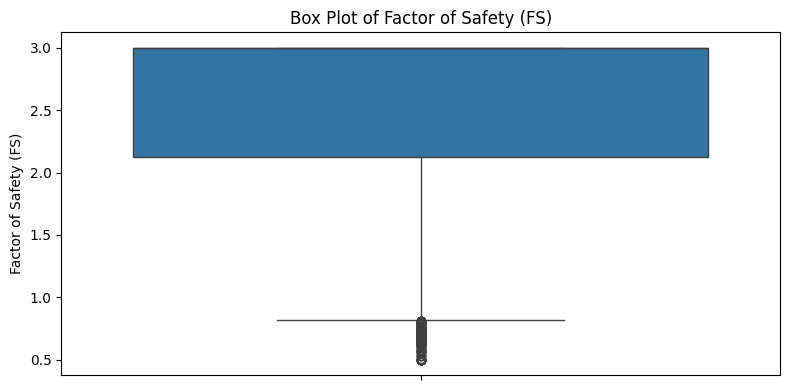

In [19]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Count plot for Reinforcement Type (a pie chart alternative)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Reinforcement Type')
plt.title('Count Plot for Reinforcement Type')
plt.xlabel('Reinforcement Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box plot for Factor of Safety (FS) which is critical in our analysis
plt.figure(figsize=(8, 4))
sns.boxplot(y=data['Factor of Safety (FS)'])
plt.title('Box Plot of Factor of Safety (FS)')
plt.ylabel('Factor of Safety (FS)')
plt.tight_layout()
plt.show()

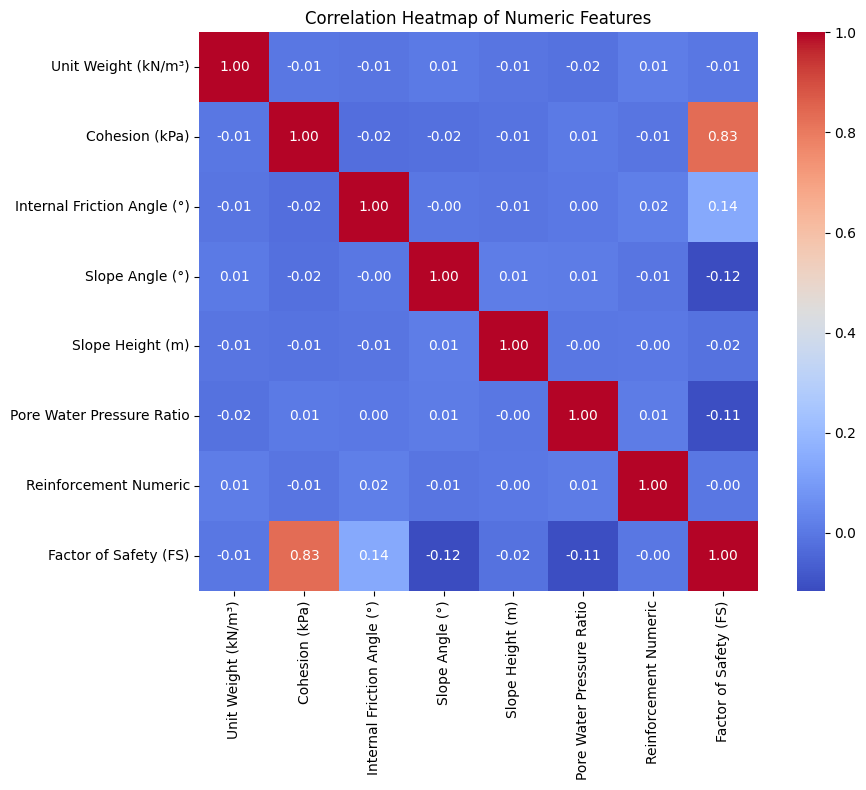

In [20]:
numeric_df = data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric features to generate a correlation heatmap.')

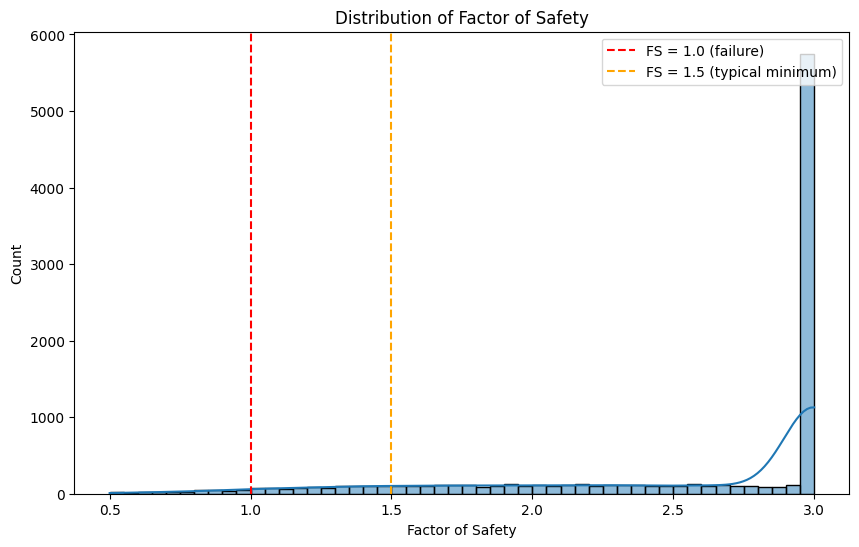

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Factor of Safety (FS)'], bins=50, kde=True)
plt.axvline(1.0, color='red', linestyle='--', label='FS = 1.0 (failure)')
plt.axvline(1.5, color='orange', linestyle='--', label='FS = 1.5 (typical minimum)')
plt.title('Distribution of Factor of Safety')
plt.xlabel('Factor of Safety')
plt.legend()
plt.show()

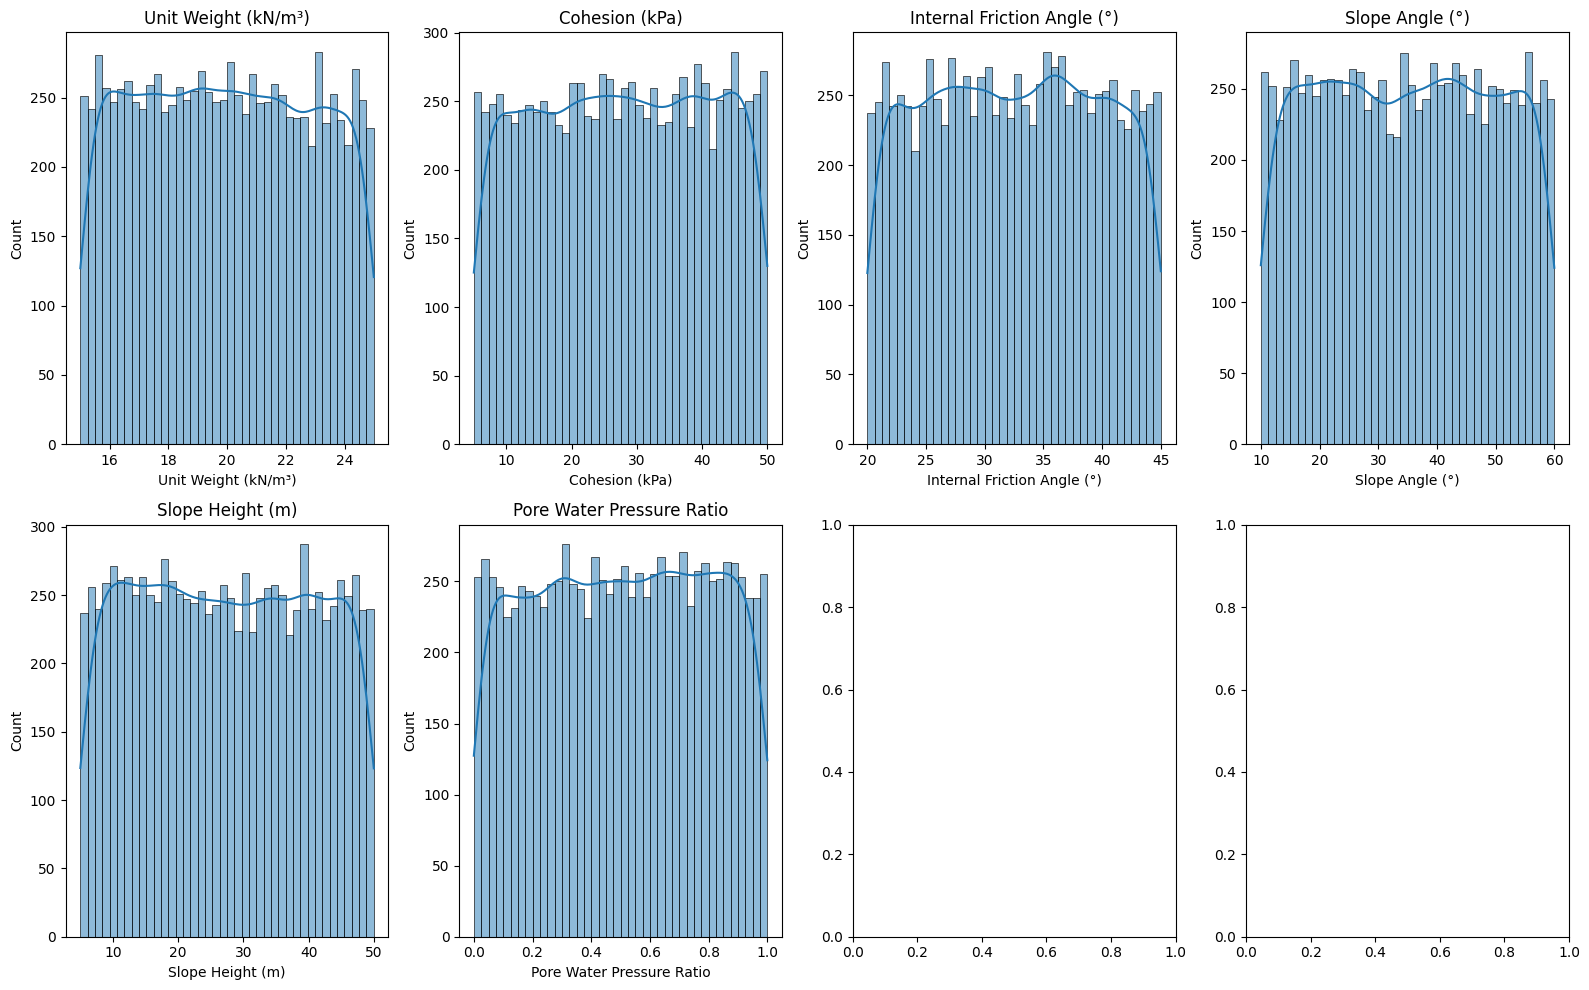

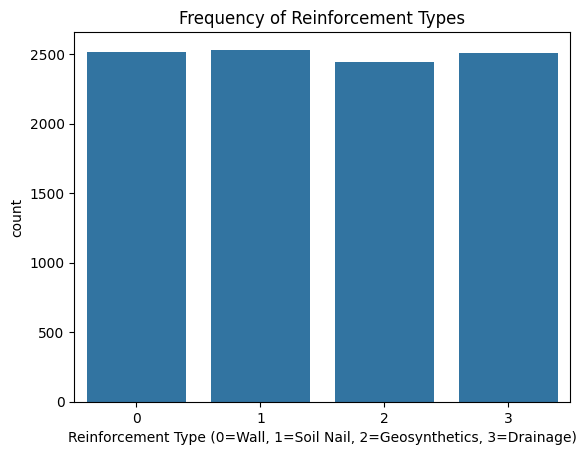

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
features = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
            'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio']

for i, feat in enumerate(features):
    ax = axes.flatten()[i]
    sns.histplot(data[feat], bins=40, kde=True, ax=ax)
    ax.set_title(feat)
plt.tight_layout()
plt.show()

# Reinforcement type
sns.countplot(data=data, x='Reinforcement Numeric')
plt.title('Frequency of Reinforcement Types')
plt.xlabel('Reinforcement Type (0=Wall, 1=Soil Nail, 2=Geosynthetics, 3=Drainage)')
plt.show()

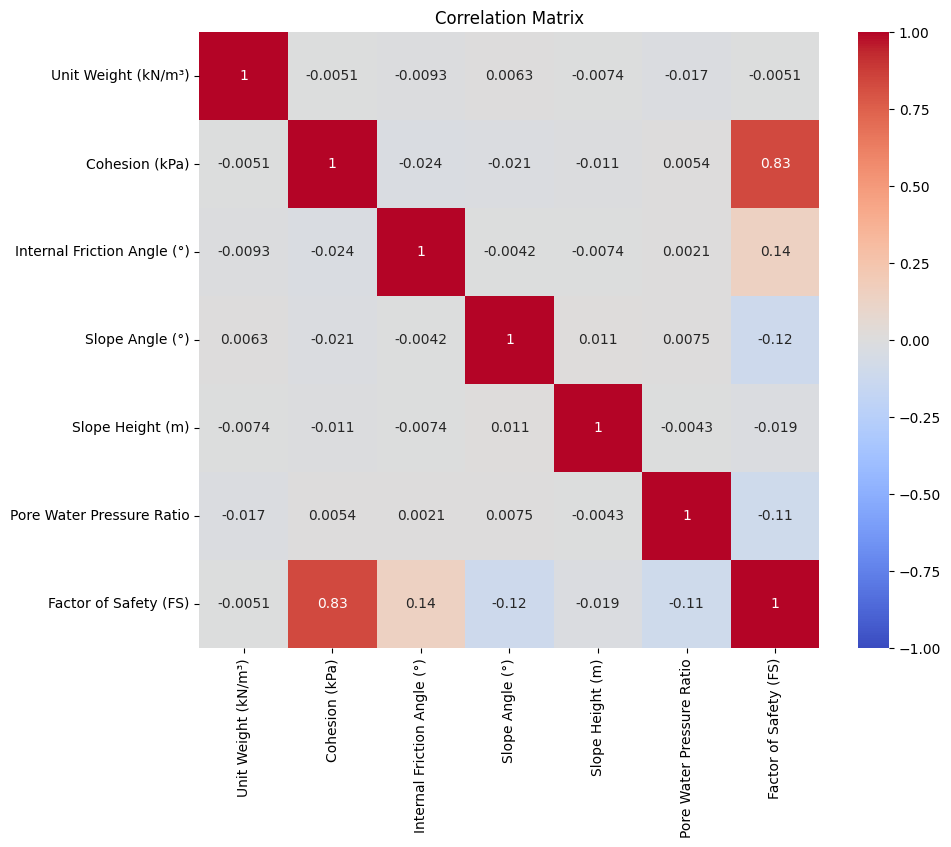

In [25]:
# Correlation matrix (exclude categorical reinforcement for now)
corr = data[['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
           'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
           'Factor of Safety (FS)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

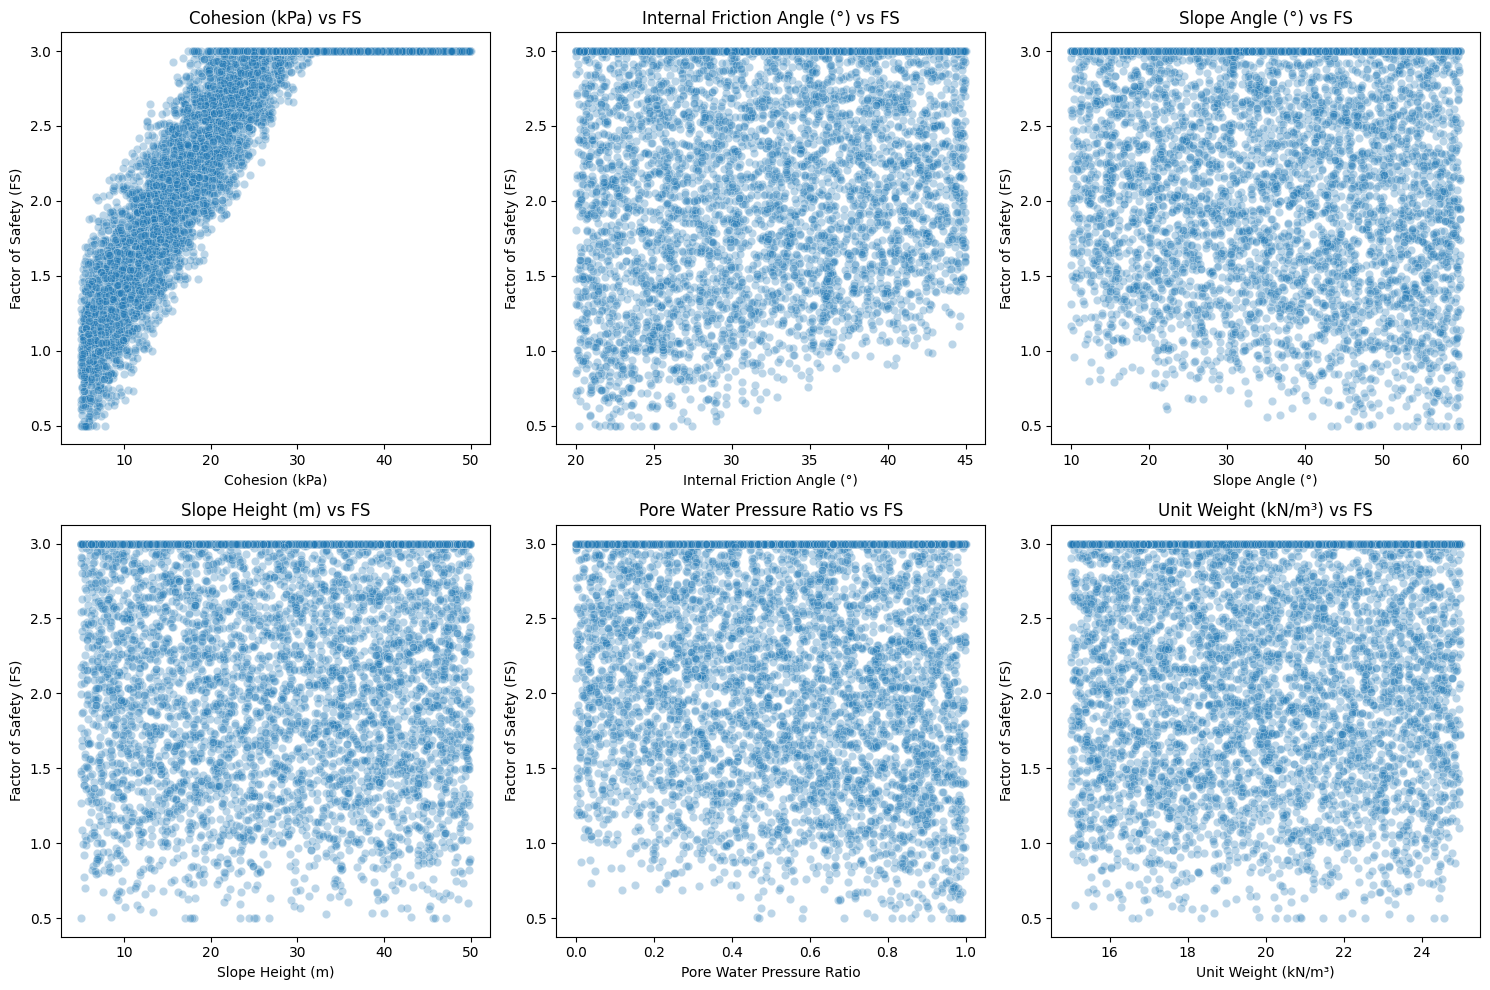

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['Cohesion (kPa)', 'Internal Friction Angle (°)', 'Slope Angle (°)',
            'Slope Height (m)', 'Pore Water Pressure Ratio', 'Unit Weight (kN/m³)']

for i, feat in enumerate(features):
    ax = axes.flatten()[i]
    sns.scatterplot(data=data, x=feat, y='Factor of Safety (FS)', alpha=0.3, ax=ax)
    ax.set_title(f'{feat} vs FS')
plt.tight_layout()
plt.show()

In [28]:
stable = data[data['Factor of Safety (FS)'] == 3.0]
unstable = data[data['Factor of Safety (FS)'] < 3.0]

print(f"Rows with FS = 3.0: {len(stable)} ({len(stable)/len(data)*100:.1f}%)")
print("\nMean values for FS = 3.0 vs FS < 3.0:\n")
comparison = pd.DataFrame({
    'FS = 3.0': stable.mean(numeric_only=True),
    'FS < 3.0': unstable.mean(numeric_only=True)
})
print(comparison)

Rows with FS = 3.0: 5635 (56.4%)

Mean values for FS = 3.0 vs FS < 3.0:

                              FS = 3.0   FS < 3.0
Unit Weight (kN/m³)          19.933778  19.951687
Cohesion (kPa)               37.344272  15.258528
Internal Friction Angle (°)  33.102951  31.724507
Slope Angle (°)              33.795089  36.408102
Slope Height (m)             27.163580  27.610982
Pore Water Pressure Ratio     0.487476   0.523371
Reinforcement Numeric         1.486424   1.504467
Factor of Safety (FS)         3.000000   1.957807
